# The power of the Wald test for proportions.
The test uses the test statistic
$$
T = \frac{\hat p - p_0}{\widehat{se}} = \frac{\hat p - p_0}{\sqrt{p_0(1 - p_0)/n}}.
$$

## Probability of Type II Error $\beta(p_a)$ and Power $1 - \beta(p_a)$.
We write a function that calculate these quantities here.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def compute_beta(p0, pa, alternative="<", alpha=0.05, n=100):
    """
    Calculate the Type II error probability (beta) for a one-sided hypothesis test:

      H0: p = p0
    versus
      Ha: p < p0   if alternative = "<"
      Ha: p > p0   if alternative = ">"

    Parameters:
        p0         : the null hypothesis proportion.
        pa         : the true (alternative) proportion.
        alternative: a string specifying the alternative hypothesis, "<" or ">".
        alpha      : significance level (default 0.05).
        n          : sample size (default 100).

    Returns:
        beta: The Type II error probability.

    The formulas used are:

    For Ha: p < p0 (left-tailed test):
      Critical value: c = p0 - z_{1-alpha} * sqrt(p0*(1-p0)/n)
      beta = P(p-hat > c) under pa = 1 - Phi((c - pa)/sqrt(pa*(1-pa)/n))

    For Ha: p > p0 (right-tailed test):
      Critical value: c = p0 + z_{1-alpha} * sqrt(p0*(1-p0)/n)
      beta = P(p-hat < c) under pa = Phi((c - pa)/sqrt(pa*(1-pa)/n))
    """
    # Calculate z_alpha using the percentile function for a one-tailed test
    z_alpha = norm.ppf(1 - alpha)

    # Standard error under H0
    se0 = np.sqrt(p0 * (1 - p0) / n)

    # Standard error under the alternative proportion
    sea = np.sqrt(pa * (1 - pa) / n)

    if alternative == "<":
        # Critical value for left-tailed test:
        # c = p0 - z_alpha * se0, then (c - pa) = (p0 - pa) - z_alpha * se0
        z_value = ((p0 - pa) - z_alpha * se0) / sea
        beta = 1 - norm.cdf(z_value)
    elif alternative == ">":
        # Critical value for right-tailed test:
        # c = p0 + z_alpha * se0, then (c - pa) = (p0 - pa) + z_alpha * se0
        z_value = ((p0 - pa) + z_alpha * se0) / sea
        beta = norm.cdf(z_value)
    else:
        raise ValueError("alternative must be '<' or '>'")

    return beta


def compute_power(p0, pa, alternative="<", alpha=0.05, n=100):
    """
    Calculate the power of the test, which is 1 minus the Type II error probability.

    Parameters:
        p0         : the null hypothesis proportion.
        pa         : the true (alternative) proportion.
        alternative: a string specifying the alternative hypothesis, "<" or ">".
        alpha      : significance level (default 0.05).
        n          : sample size (default 100).

    Returns:
        power: The power of the test (1 - beta).
    """
    beta = compute_beta(p0, pa, alternative, alpha, n)
    power = 1 - beta
    return power

# Example usage:
p0 = 0.1
pa = 0.15
alpha = 0.05
n = 100

# For alternative hypothesis Ha: p < p0
beta_less = compute_beta(p0, pa, alternative="<", alpha=alpha, n=n)
power_less = compute_power(p0, pa, alternative="<", alpha=alpha, n=n)
print("For Ha: p < p0")
print("beta =", f"{beta_less:.5f}")
print("power =", f"{power_less:.5f}")

# For alternative hypothesis Ha: p > p0
beta_greater = compute_beta(p0, pa, alternative=">", alpha=alpha, n=n)
power_greater = compute_power(p0, pa, alternative=">", alpha=alpha, n=n)
print("\nFor Ha: p > p0")
print("beta =", f"{beta_greater:.5f}")
print("power =", f"{power_greater:.5f}")



For Ha: p < p0
beta = 0.99730
power = 0.00270

For Ha: p > p0
beta = 0.49269
power = 0.50731


## Dependence of the probability $\beta$ of Type II error (inability to make a discovery when necessary) on the probability $\alpha$ of Type I error (the false discovery)

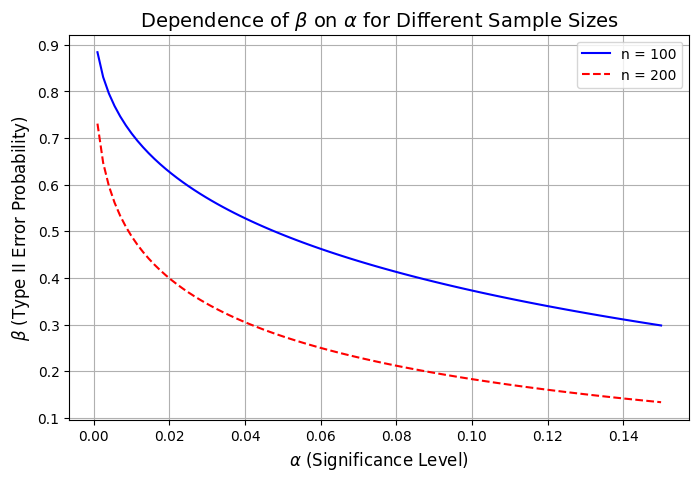

In [ ]:

# Parameters for the plot
p0 = 0.1          # Null hypothesis proportion
pa = 0.15         # True (alternative) proportion
alpha_values = np.linspace(0.001, 0.15, 100)  # Range of alpha values

# Compute beta for each alpha for two different sample sizes: n=100 and n=200
beta_n100 = [compute_beta(p0, pa, alternative=">", alpha=a, n=100) for a in alpha_values]
beta_n200 = [compute_beta(p0, pa, alternative=">", alpha=a, n=200) for a in alpha_values]

# Plotting the curves
plt.figure(figsize=(8, 5))
plt.plot(alpha_values, beta_n100, label="n = 100", linestyle='-', color='b')
plt.plot(alpha_values, beta_n200, label="n = 200", linestyle='--', color='r')
plt.xlabel(r'$\alpha$ (Significance Level)', fontsize=12)
plt.ylabel(r'$\beta$ (Type II Error Probability)', fontsize=12)
plt.title(r'Dependence of $\beta$ on $\alpha$ for Different Sample Sizes', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**Conclusion:** For every significance level, the power of the test can be increased by increasing the sample size $n$.

## Dependence of $\beta$ on the alternative $p_a$

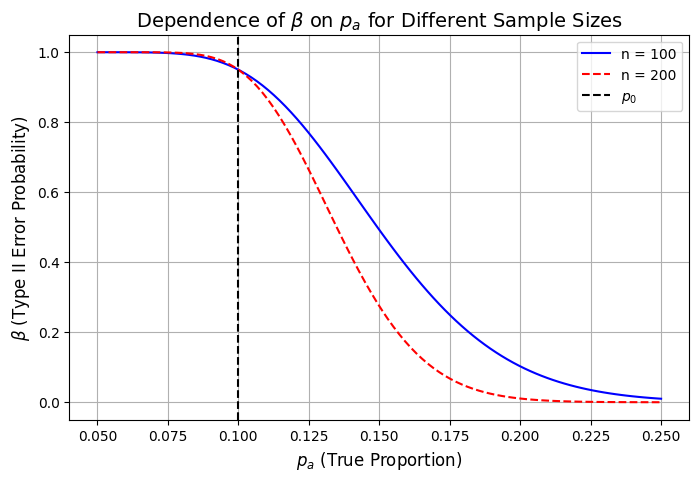

In [ ]:

# Parameters for the plots
p0 = 0.1          # Null hypothesis proportion
alpha = 0.05      # Significance level
n_values = [100, 200]  # Two different sample sizes to compare

# Create a range of pa values.
# For a left-tailed test with p0=0.2, it's most relevant to consider pa values near p0.
pa_values = np.linspace(0.05, 0.25, 100)

# Compute beta for each pa for the two different sample sizes.
beta_n100 = [compute_beta(p0, pa, alternative=">", alpha=alpha, n=100) for pa in pa_values]
beta_n200 = [compute_beta(p0, pa, alternative=">", alpha=alpha, n=200) for pa in pa_values]

# Plotting the curves
plt.figure(figsize=(8, 5))
plt.plot(pa_values, beta_n100, label="n = 100", linestyle='-', color='b', linewidth=1.5)
plt.plot(pa_values, beta_n200, label="n = 200", linestyle='--', color='r', linewidth=1.5)

# Add a vertical line at p0
plt.axvline(x=p0, color='k', linestyle='--', linewidth=1.5, label=r'$p_0$')

plt.xlabel(r'$p_a$ (True Proportion)', fontsize=12)
plt.ylabel(r'$\beta$ (Type II Error Probability)', fontsize=12)
plt.title(r'Dependence of $\beta$ on $p_a$ for Different Sample Sizes', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

What happens when the alternative hypothesis becomes farther or closer to the null hypothesis? What is the probability of type II error (no discovery/action when needed) when $p_a \approx p_0$?